-----------Data Augmentation-----------
Contenido de la carpeta actual:
0 ) .ipynb_checkpoints
1 ) ejemplos.jpg
2 ) db
3 ) augmentations.py
4 ) DataAugmentation.ipynb
5 ) dataAugmentation.py



Ingrese el número de opción donde se encuentre la carpeta: 2



selecciono la carpeta:  db

Se mostrará una imágen con ejemplos de data augmentation disponibles



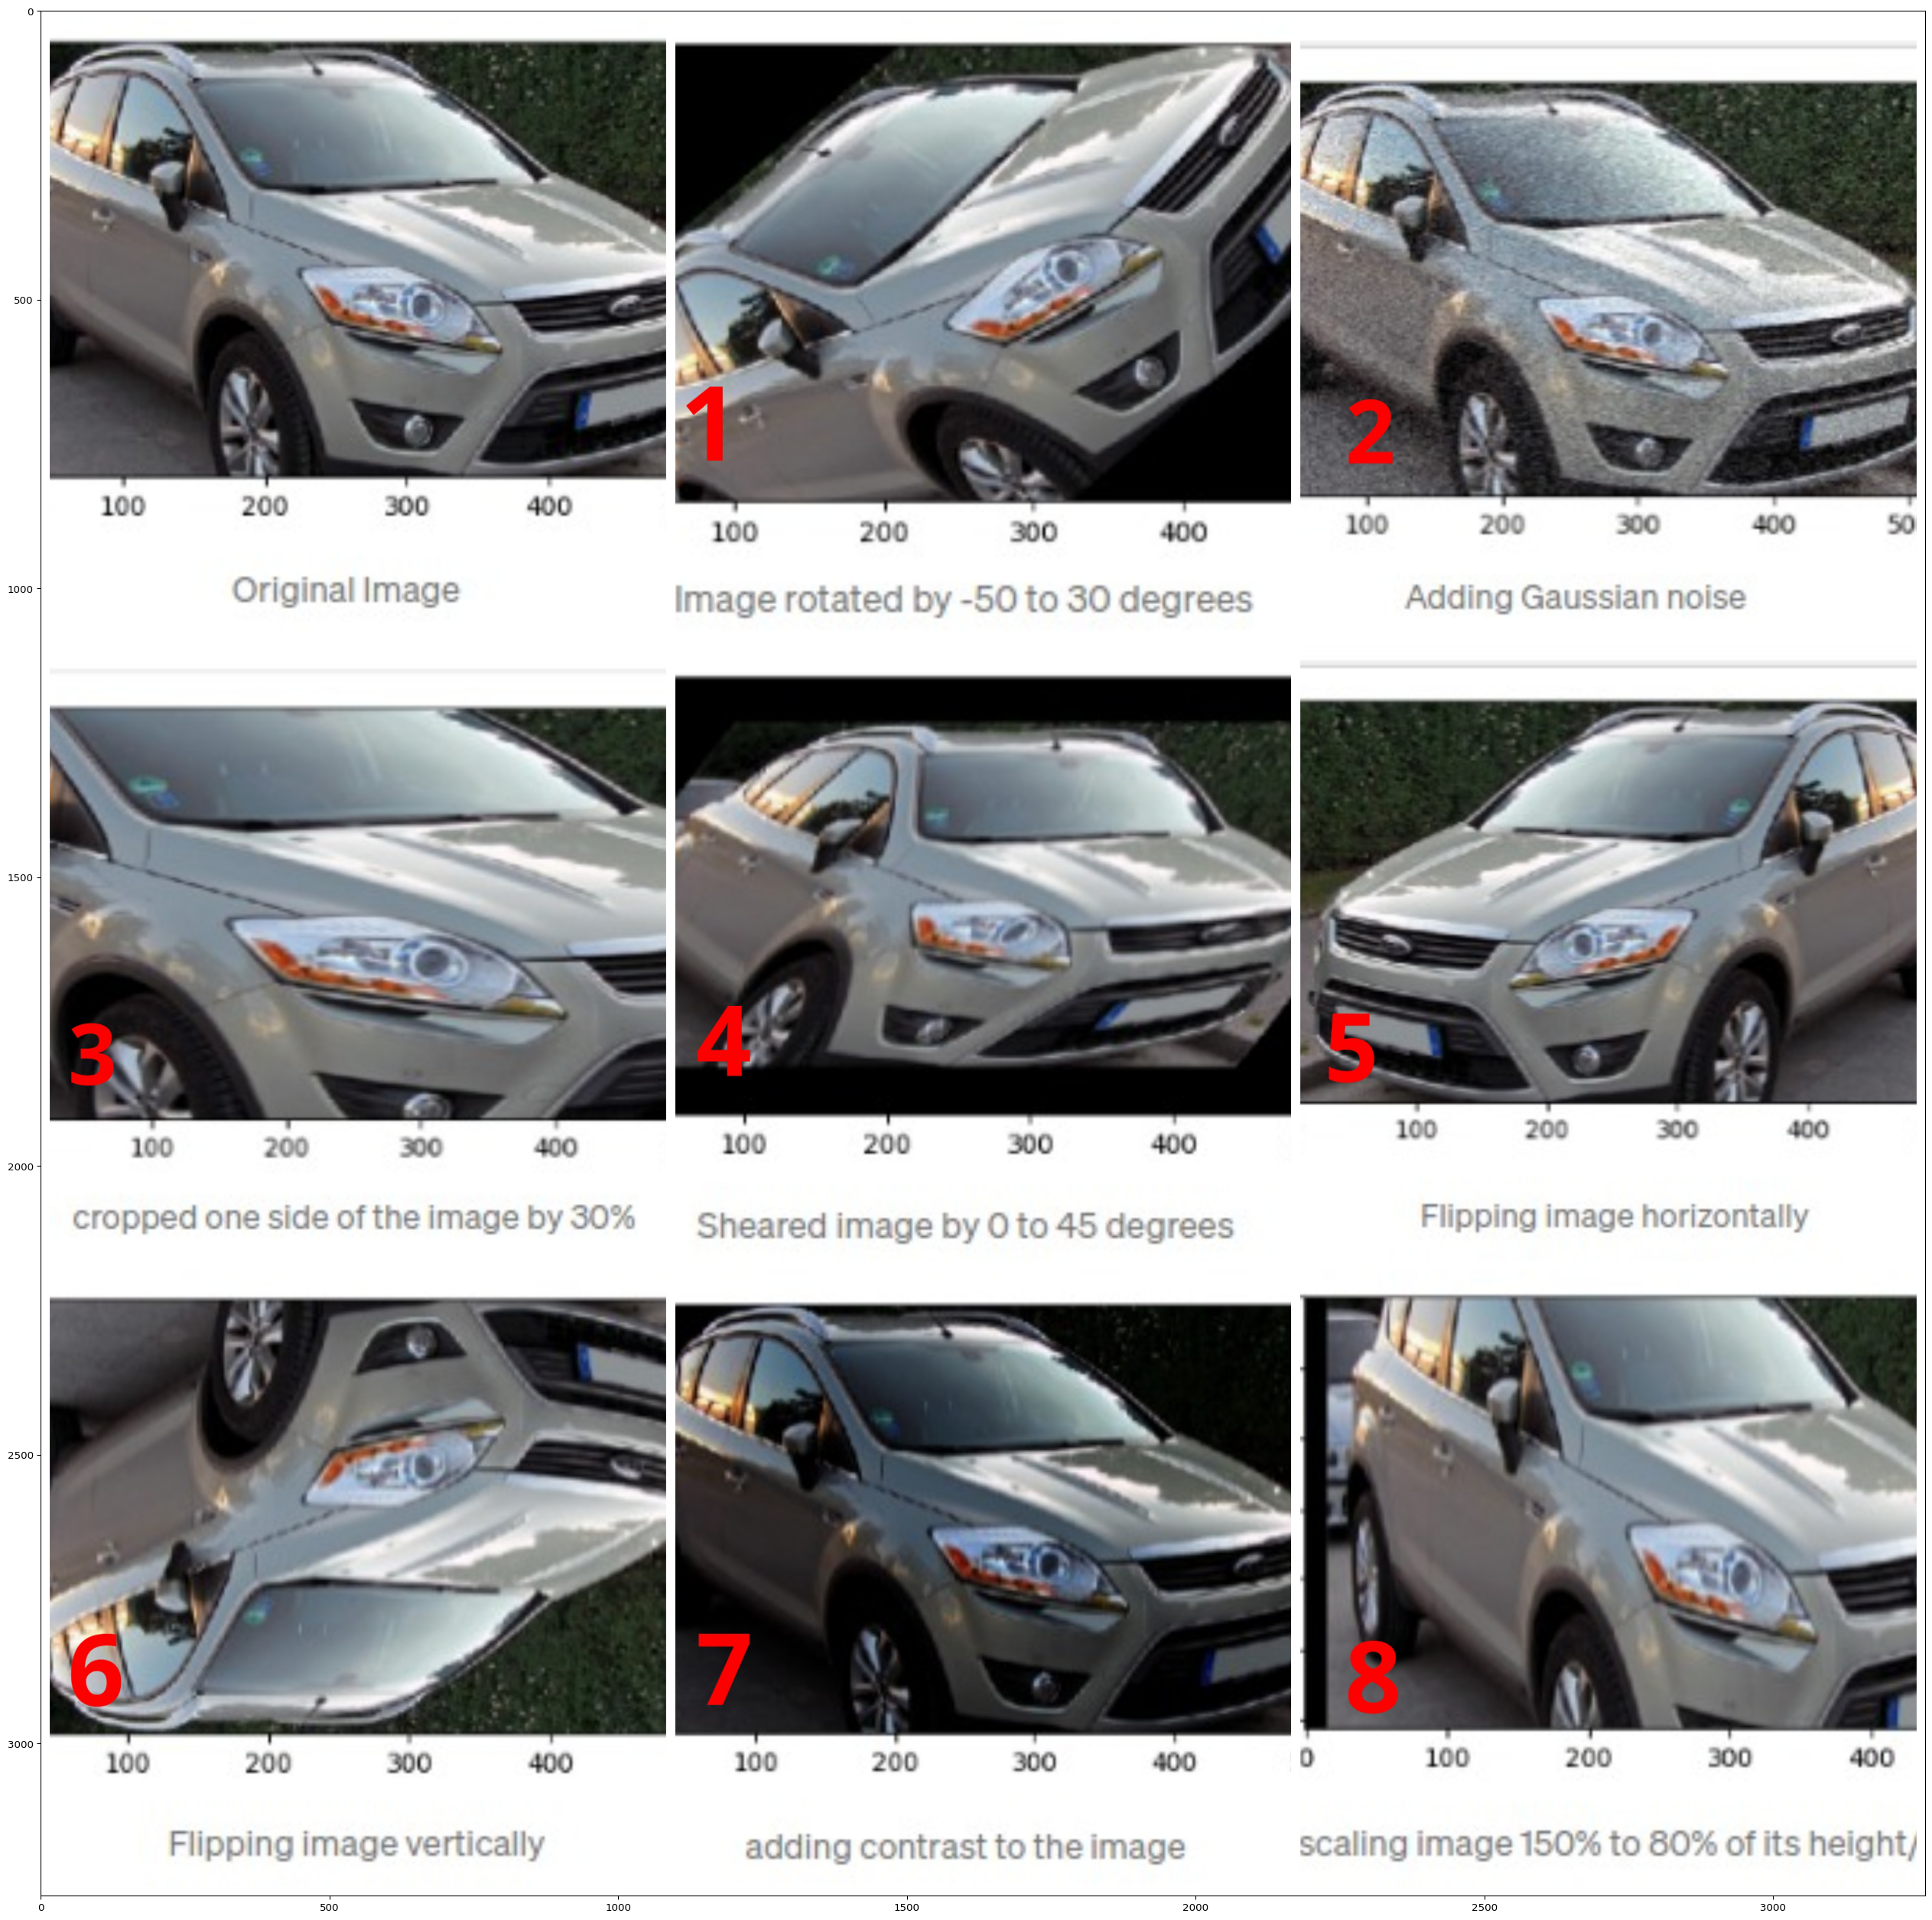


OPCIONES DE DATA AUGMENTATION:
1. Rotación: Rota la imagen por un grado en específico.
2. Ruido: Agrega ruido a la imagen.
3. Zoom: Da un corte a la imagen y simula un zoom.
4. Inclinación: Añade un grado de inclinación a la imagen.
5. Voltea la imagen horizontalmente.
6. Voltea la imagen verticalmente.
7. Cambio de Contraste: Ajusta el brillo de la imagen usando gama de contrastes.
8. Escalado de Imagen: Añade un ajuste a la imagen en sus laterales (hace ver más delgada la imágen). 




Ingrese la opción de data augmentation:  7


INGRESE UN VALOR ENTERO DEL 1 AL 9, SE RECOMIENDA 2


Ingrese grado de brillo:  3


CONTRASTE REALIZADO


In [3]:
import os
import imageio
from os import listdir
import os #librería para crear carpetas
import cv2
import imgaug.augmenters as iaa
import imgaug as ia


print("-----------Data Augmentation-----------")
contenido = os.listdir()
print("Contenido de la carpeta actual:")
for i in range(len(contenido)):
    print(i,")", contenido[i])
#print(contenido)
print()
opcion=int(input("Ingrese el número de opción donde se encuentre la carpeta:"))
print()
carpetaPrincipal=contenido[opcion]
print("selecciono la carpeta: ",carpetaPrincipal )
print()
print("Se mostrará una imágen con ejemplos de data augmentation disponibles")
print()
image = imageio.imread('ejemplos.jpg')
ia.imshow(image)
print("")

print("OPCIONES DE DATA AUGMENTATION:")
print("1. Rotación: Rota la imagen por un grado en específico.")
print("2. Ruido: Agrega ruido a la imagen.")
print("3. Zoom: Da un corte a la imagen y simula un zoom.")
print("4. Inclinación: Añade un grado de inclinación a la imagen.")
print("5. Voltea la imagen horizontalmente.")
print("6. Voltea la imagen verticalmente.")
print("7. Cambio de Contraste: Ajusta el brillo de la imagen usando gama de contrastes.")
print("8. Escalado de Imagen: Añade un ajuste a la imagen en sus laterales (hace ver más delgada la imágen). ")
print("")
print("")

opcionDA=int(input("Ingrese la opción de data augmentation: "))

imagenes=os.listdir(carpetaPrincipal)

if(opcionDA==1):
    carpetaImagenes="DA_ROTACION_"+carpetaPrincipal
    os.makedirs(carpetaImagenes) #creamos la carpeta
    print("Selecciono rotación de imagen")
    inclinacion1=int(input("Ingrese grado de inclinacion negativo: "))
    inclinacion2=int(input("Ingrese grado de inclinacion positivo: "))
    #rotate=iaa.Affine(rotate=(-50, 30))
    for i in range(len(imagenes)):
        rotate=iaa.Affine(rotate=(-inclinacion1, inclinacion2))
        image = imageio.imread(carpetaPrincipal+"/"+imagenes[i])
        rotated_image=rotate.augment_image(image)
        #ia.imshow(rotated_image)
        imageio.imwrite(carpetaImagenes+"/"+"da_"+imagenes[i],rotated_image)
    print("ROTACIÓN REALIZADO")
    
if(opcionDA==2):
    carpetaImagenes="DA_RUIDO_GAUSSIANO_"+carpetaPrincipal
    os.makedirs(carpetaImagenes) #creamos la carpetacarpetaImagenes="DA_ROTACION_"+carpetaPrincipal
    print("SE RECOMIENDA INGRESAR EN CADA GRADO: 10 Y 20")
    ruido1=int(input("Ingrese grado de ruido 1: "))
    ruido2=int(input("Ingrese grado de ruido 2: "))
    for i in range(len(imagenes)):
        gaussian_noise=iaa.AdditiveGaussianNoise(ruido1,ruido2)
        image = imageio.imread(carpetaPrincipal+"/"+imagenes[i])
        noise_image=gaussian_noise.augment_image(image)
        #ia.imshow(noise_image)
        imageio.imwrite(carpetaImagenes+"/"+"da_"+imagenes[i],noise_image)
    print("RUIDO GAUSSIANO REALIZADO")
        
if(opcionDA==3):
    carpetaImagenes="DA_CROPPED_"+carpetaPrincipal
    os.makedirs(carpetaImagenes) #creamos la carpeta
    print("INGRESE UN VALOR ENTERO DEL 1 AL 9, SE RECOMIENDA 3")
    valorCorte=int(input("Ingrese porcentaje del corte: "))
    for i in range(len(imagenes)):
        image = imageio.imread(carpetaPrincipal+"/"+imagenes[i])
        crop = iaa.Crop(percent=(0, valorCorte*0.1)) # crop image
        corp_image=crop.augment_image(image)        
        #ia.imshow(corp_image)
        imageio.imwrite(carpetaImagenes+"/"+"da_"+imagenes[i],corp_image)
    print("CROOPED REALIZADO")
        
if(opcionDA==4):
    carpetaImagenes="DA_INCLINACION_"+carpetaPrincipal
    os.makedirs(carpetaImagenes) #creamos la carpeta
    print("INGRESE UN VALOR ENTERO DEL 1 AL 100, SE RECOMIENDA 40")
    inclinacion=int(input("Ingrese inclinación: "))
    for i in range(len(imagenes)):
        image = imageio.imread(carpetaPrincipal+"/"+imagenes[i])
        
        shear = iaa.Affine(shear=(0,inclinacion))
        shear_image=shear.augment_image(image)
        #ia.imshow(shear_image)
        
        imageio.imwrite(carpetaImagenes+"/"+"da_"+imagenes[i],shear_image)
    print("INCLINACIÓN REALIZADO")
        
if(opcionDA==5):
    carpetaImagenes="DA_FLIPPING_HORIZONTAL_"+carpetaPrincipal
    os.makedirs(carpetaImagenes) #creamos la carpeta

    for i in range(len(imagenes)):
        image = imageio.imread(carpetaPrincipal+"/"+imagenes[i])
        
        flip_hr=iaa.Fliplr(p=1.0)
        flip_hr_image= flip_hr.augment_image(image)
        #ia.imshow(flip_hr_image)
        
        imageio.imwrite(carpetaImagenes+"/"+"da_"+imagenes[i],flip_hr_image)
    print("FLIPPING HORIZONTAL REALIZADO")
        
if(opcionDA==6):
    carpetaImagenes="DA_FLIPPING_VERTICAL_"+carpetaPrincipal
    os.makedirs(carpetaImagenes) #creamos la carpeta
    for i in range(len(imagenes)):
        image = imageio.imread(carpetaPrincipal+"/"+imagenes[i])
        
        flip_vr=iaa.Flipud(p=1.0)
        flip_vr_image= flip_vr.augment_image(image)
        #ia.imshow(flip_vr_image)
        
        imageio.imwrite(carpetaImagenes+"/"+"da_"+imagenes[i],flip_vr_image)
    print("FLIPPING VERTICAL REALIZADO")
        
if(opcionDA==7):
    carpetaImagenes="DA_CONTRASTE_"+carpetaPrincipal
    os.makedirs(carpetaImagenes) #creamos la carpeta
    print("INGRESE UN VALOR ENTERO DEL 1 AL 9, SE RECOMIENDA 2")
    brillo=int(input("Ingrese grado de brillo: "))
    for i in range(len(imagenes)):
        image = imageio.imread(carpetaPrincipal+"/"+imagenes[i])
        
        contrast=iaa.GammaContrast(gamma=brillo)
        contrast_image =contrast.augment_image(image)
        #ia.imshow(contrast_image)
        
        imageio.imwrite(carpetaImagenes+"/"+"da_"+imagenes[i],contrast_image)
    print("CONTRASTE REALIZADO")
        
        
if(opcionDA==8):
    carpetaImagenes="DA_SCALING_"+carpetaPrincipal
    os.makedirs(carpetaImagenes) #creamos la carpeta
    for i in range(len(imagenes)):
        image = imageio.imread(carpetaPrincipal+"/"+imagenes[i])
        
        scale_im=iaa.Affine(scale={"x": (1.5, 1.0), "y": (1.5, 1.0)})
        scale_image =scale_im.augment_image(image)
        #ia.imshow(scale_image)
        
        imageio.imwrite(carpetaImagenes+"/"+"da_"+imagenes[i],scale_image)
    print("SCALING REALIZADO")
    
        
            